In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
dataset = pd.read_csv('preProcessed_data.csv')
dataset.head()

,EmployeeNumber,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,1,0.540049,0.747745,-1.505350,-0.891688,-0.660531,1.222252,0.379672,-0.057788,1.153254,0.219493,0.749719,2.125136,-1.292677,-0.426230,-1.584178,-0.932014,-2.171982,-2.493820,0.177344,-0.973342,-0.3371,-0.481859,0.639841,-0.211604,-1.374051,1.515244,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
1,2,0,1.257501,-1.333318,0.252002,-1.868426,0.254625,-0.075755,-1.026167,-0.057788,-0.660853,-0.014600,1.137918,-0.678049,1.942306,2.346151,1.191438,0.241988,0.155707,0.338096,0.774724,-0.117271,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241
2,4,1,0.128213,1.081220,-1.031607,-0.891688,1.169781,1.157533,-1.026167,-0.961486,0.246200,-1.366318,-2.559234,1.324226,0.049962,-0.426230,-0.658973,-0.932014,0.155707,0.338096,-2.394527,-0.973342,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
3,5,0,-0.329472,1.102066,-0.695482,1.061787,1.169781,-0.331508,0.379672,-0.961486,0.246200,-0.868626,1.023003,-0.678049,-1.292677,-0.426230,0.266233,-0.932014,0.155707,0.338096,0.509502,0.738799,-0.3371,2.075297,-1.562889,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,1.224745,-1.224745,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-1.591746,1.591746
4,7,0,-1.128410,-0.196828,-1.031607,-1.868426,-1.575686,-1.333672,0.379672,-0.961486,-0.660853,-0.604032,0.500186,2.525591,-0.919111,-0.426230,1.191438,0.241988,0.155707,0.338096,-0.942513,0.383498,-0.3371,-0.481859,0.639841,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.816497,0.816497,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241


In [3]:
dataset.shape

(1470, 50)

In [4]:
dataset.isnull().sum()

EmployeeNumber                       0
Attrition                            0
Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsSinceLastPromotion              0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resource

In [5]:
dataset.dtypes

EmployeeNumber                         int64
Attrition                              int64
Age                                  float64
DailyRate                            float64
DistanceFromHome                     float64
Education                            float64
EnvironmentSatisfaction              float64
HourlyRate                           float64
JobInvolvement                       float64
JobLevel                             float64
JobSatisfaction                      float64
MonthlyIncome                        float64
MonthlyRate                          float64
NumCompaniesWorked                   float64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StockOptionLevel                     float64
TrainingTimesLastYear                float64
WorkLifeBalance                      float64
YearsAtCompany                       float64
YearsSinceLastPromotion              float64
BusinessTr

In [6]:
dataset['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [7]:
print(dataset['Attrition'].value_counts(normalize=True))

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


The dataset is highly imbalanced. So, performing Oversampling before applying the ML models

In [8]:
# Independent and dependent variables

X = dataset.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = dataset['Attrition']

In [9]:
#X.head()
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [10]:
# Splitting the dataset into train and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(1029, 48)

In [12]:
y_train.shape

(1029,)

# OVERSAMPLING using SMOTETomek

In [13]:
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import SMOTE
from collections import Counter

In [14]:
os = SMOTETomek()
X_train_upsampled, y_train_upsampled = os.fit_resample(X_train, y_train)

print("The number of classes before oversampling: {}".format(Counter(y_train)))
print("The number of classes after oversampling: {}".format(Counter(y_train_upsampled)))

The number of classes before oversampling: Counter({0: 853, 1: 176})
The number of classes after oversampling: Counter({0: 852, 1: 852})


In [15]:
# # Splitting the dataset into train and test datasets

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.3, random_state=42)

# Training multiple ML models

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve 

In [17]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Gaussian Naive Bayes":GaussianNB(),
    "KNN":KNeighborsClassifier(n_neighbors=5,algorithm='auto'), 
    "SVC":SVC(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_upsampled, y_train_upsampled) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_upsampled)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_upsampled, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_upsampled, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_upsampled, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_upsampled, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_upsampled, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8333
- F1 score: 0.8332
- Precision: 0.8142
- Recall: 0.8638
- Roc Auc Score: 0.8333
----------------------------------
Model performance for Test set
- Accuracy: 0.7982
- F1 score: 0.8212
- Precision: 0.3772
- Recall: 0.7049
- Roc Auc Score: 0.7590


Gaussian Naive Bayes
Model performance for Training set
- Accuracy: 0.7312
- F1 score: 0.7253
- Precision: 0.6788
- Recall: 0.8779
- Roc Auc Score: 0.7312
----------------------------------
Model performance for Test set
- Accuracy: 0.5624
- F1 score: 0.6280
- Precision: 0.2027
- Recall: 0.7377
- Roc Auc Score: 0.6360


KNN
Model performance for Training set
- Accuracy: 0.8803
- F1 score: 0.8786
- Precision: 0.8086
- Recall: 0.9965
- Roc Auc Score: 0.8803
----------------------------------
Model performance for Test set
- Accuracy: 0.6395
- F1 score: 0.6948
- Precision: 0.2216
- Recall: 0.6393
- Roc Auc Score: 0.6394


SVC
Model performance for Training set
- Accuracy: 

c:\Technocolabs Internship\Week 1\Acme-Attrition-Analysis-and-Turnover-Prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost
Model performance for Training set
- Accuracy: 0.9249
- F1 score: 0.9249
- Precision: 0.9239
- Recall: 0.9261
- Roc Auc Score: 0.9249
----------------------------------
Model performance for Test set
- Accuracy: 0.8662
- F1 score: 0.8657
- Precision: 0.5167
- Recall: 0.5082
- Roc Auc Score: 0.7159


Xgboost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8798
- F1 score: 0.8600
- Precision: 0.6429
- Recall: 0.2951
- Roc Auc Score: 0.6344




# Voting Classifier

In [18]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=5,algorithm='auto')
clf4 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('gnb', clf2), ('knn', clf3), ('ada', clf4)], voting='soft')
eclf1.fit(X_train_upsampled, y_train_upsampled)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test, predictions)

print("AUC:", auc)
plt.show()

c:\Technocolabs Internship\Week 1\Acme-Attrition-Analysis-and-Turnover-Prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Final Accuracy Score 
0.671201814058957
Overall Precision: 0.2529411764705882
Overall Recall: 0.7049180327868853
AUC: 0.6853537532355479


In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       380
           1       0.25      0.70      0.37        61

    accuracy                           0.67       441
   macro avg       0.59      0.69      0.57       441
weighted avg       0.84      0.67      0.72       441



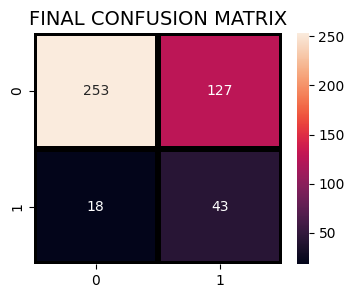

In [20]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

# Hyperparameter Tuning

1. Logistic Regression

In [21]:
lr_model = LogisticRegression()
#penalty = ['l1', 'l2', 'elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [22]:
params = dict(C = c_values, solver = solver)

In [23]:
params

{'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#cv=StratifiedKFold()
grid=GridSearchCV(estimator = lr_model, param_grid = params, scoring= 'recall', cv=5)

In [25]:
grid.fit(X_train_upsampled, y_train_upsampled)

c:\Technocolabs Internship\Week 1\Acme-Attrition-Analysis-and-Turnover-Prediction\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Technocolabs Internship\Week 1\Acme-Attrition-Analysis-and-Turnover-Prediction\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Technocolabs Internship\Week 1\Acme-Attrition-Analysis-and-Turnover-Prediction\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Technocolabs Internship\Week 1\Acme-Attrition-Analysis-and-Turnover-Prediction\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Technocolabs Internship\Week 1\Acme-A

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

In [26]:
grid.best_params_

{'C': 0.01, 'solver': 'liblinear'}

In [27]:
# Logistic Regression's best model
lr_tuned = grid.best_estimator_

In [28]:
lr_tuned

LogisticRegression(C=0.01, solver='liblinear')

In [29]:
y_pred = lr_tuned.predict(X_test)

In [30]:
print ('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)

print("AUC:", auc)
plt.show()

Confusion Matrix:
[[280 100]
 [ 17  44]]
Accuracy: 0.7346938775510204
F1-score: 0.4292682926829268
Overall Precision: 0.3055555555555556
Overall Recall: 0.7213114754098361
AUC: 0.729076790336497


2. Gaussian Naive Bayes

In [31]:
gnb = GaussianNB()

params = {"var_smoothing": np.logspace(0,-9, num=100)}

grid = GridSearchCV(gnb, param_grid = params, scoring='recall', cv=10)

In [32]:
grid.fit(X_train_upsampled, y_train_upsampled)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='recall')

In [33]:
grid.best_params_

{'var_smoothing': np.float64(1.0)}

In [34]:
# GaussianNB's best model
gnb_tuned = grid.best_estimator_

In [35]:
gnb_tuned

GaussianNB(var_smoothing=np.float64(1.0))

In [36]:
y_pred = gnb_tuned.predict(X_test)

In [37]:
print ('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)

print("AUC:", auc)
plt.show()

Confusion Matrix:
[[175 205]
 [ 12  49]]
Accuracy: 0.5079365079365079
F1-Score: 0.3111111111111111
Overall Precision: 0.19291338582677164
Overall Recall: 0.8032786885245902
AUC: 0.6319025021570319


3. KNN

In [79]:
knn = KNeighborsClassifier(algorithm='auto')

k = np.random.randint(1, 50, 60)

params = {'n_neighbors': k}

grid = GridSearchCV(knn, param_grid = params, scoring='recall', cv=5)

In [80]:
grid.fit(X_train_upsampled, y_train_upsampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([45, 23, 38, 32, 37, 22,  9, 30,  8, 27, 19, 19, 22, 14, 41,  9, 35,
       28, 21, 32,  6, 47, 48, 12,  9, 30, 46,  5, 45, 47, 44, 48, 23, 39,
       21, 19, 20, 23, 35, 28, 40, 33, 32, 15, 11,  7, 12,  9, 19, 15, 21,
       28, 18, 28, 14, 47, 41, 16, 19, 26], dtype=int32)},
             scoring='recall')

In [81]:
grid.best_params_

{'n_neighbors': np.int32(5)}

In [82]:
# KNN's best model
knn_tuned = grid.best_estimator_

In [83]:
knn_tuned

KNeighborsClassifier(n_neighbors=np.int32(5))

In [84]:
y_pred = knn_tuned.predict(X_test)

In [85]:
print ('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)

print("AUC:", auc)
plt.show()

Confusion Matrix:
[[243 137]
 [ 22  39]]
Accuracy: 0.6394557823129252
F1-Score: 0.3291139240506329
Overall Precision: 0.2215909090909091
Overall Recall: 0.639344262295082
AUC: 0.6394089732528041


4. AdaBoost

In [45]:
adaBst = AdaBoostClassifier()

params = {
    "n_estimators":[50,60,70,80,90,100,200,300,500],
    "algorithm":['SAMME','SAMME.R']
}

grid = GridSearchCV(adaBst, param_grid = params, scoring = 'recall', cv = 5)

In [46]:
grid.fit(X_train_upsampled, y_train_upsampled)

c:\Technocolabs Internship\Week 1\Acme-Attrition-Analysis-and-Turnover-Prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Technocolabs Internship\Week 1\Acme-Attrition-Analysis-and-Turnover-Prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Technocolabs Internship\Week 1\Acme-Attrition-Analysis-and-Turnover-Prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Technocolabs Internship\Week 1\Acme-Attrition-Analysis-and-Turnover-Pr

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 200, 300,
                                          500]},
             scoring='recall')

In [47]:
grid.best_params_

{'algorithm': 'SAMME', 'n_estimators': 60}

In [48]:
# AdaBoost's best model
adaBst_tuned = grid.best_estimator_

In [49]:
adaBst_tuned

AdaBoostClassifier(algorithm='SAMME', n_estimators=60)

In [50]:
y_pred = adaBst_tuned.predict(X_test)

In [51]:
print ('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))
print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)

print("AUC:", auc)
plt.show()

Confusion Matrix:
[[352  28]
 [ 28  33]]
Accuracy: 0.873015873015873
F1-Score: 0.5409836065573771
Overall Precision: 0.5409836065573771
Overall Recall: 0.5409836065573771
AUC: 0.7336496980155306


# Combining the tuned models for churn prediction using Voting Classifier.

In [86]:
clf1 = lr_tuned
clf2 = gnb_tuned
clf3 = knn_tuned
clf4 = adaBst_tuned

Voting_clf = VotingClassifier(estimators=[('lr', clf1), ('gnb', clf2), ('knn', clf3), ('ada', clf4)], voting='soft')

Voting_clf.fit(X_train_upsampled, y_train_upsampled)

predictions = Voting_clf.predict(X_test)

print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))
auc = roc_auc_score(y_test, predictions)

print("AUC:", auc)
plt.show()

Final Accuracy Score 
0.6666666666666666
F1-Score: 0.379746835443038
Overall Precision: 0.2556818181818182
Overall Recall: 0.7377049180327869
AUC: 0.6964840379637618


In [87]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.66      0.77       380
           1       0.26      0.74      0.38        61

    accuracy                           0.67       441
   macro avg       0.60      0.70      0.58       441
weighted avg       0.85      0.67      0.72       441



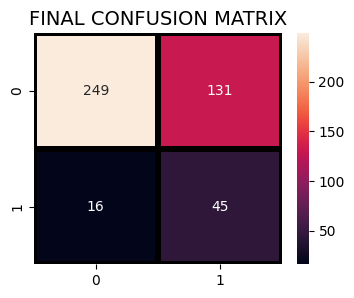

In [88]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

# The combination of Logistic Regression, Gaussian Naive Bayes, KNN and AdaBoost gives a Recall of 74% with ROC-AUC score of 70% which is performaing well and will be a good predictive model for identifying the attrition of the customer.

Saving the model

In [89]:
import pickle

In [90]:
filename = 'model.sav'

In [91]:
pickle.dump(Voting_clf, open(filename, 'wb'))